In [7]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [8]:
from keras.models import load_model
model = load_model('woundSegmentation_model.h5')

In [9]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

1/1 [==============================] - 1s 578ms/step


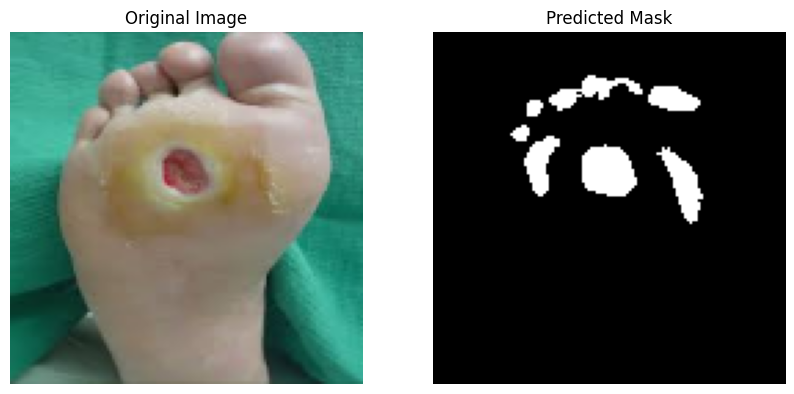

In [10]:

TEST_IMAGE_PATH = "leg1.jpg"

test_img = imread(TEST_IMAGE_PATH)[:,:,:IMG_CHANNELS]
test_img = resize(test_img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
# If needed, perform normalization or any preprocessing here

# Predict the mask for the test image
predicted_mask = model.predict(np.expand_dims(test_img, axis=0))
preds_test_t = (predicted_mask > 0.5).astype(np.uint8)

# Post-process the predicted mask if needed

# Visualize the original image and the predicted mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_img.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(preds_test_t[0, :, :, 0], cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')

plt.show()

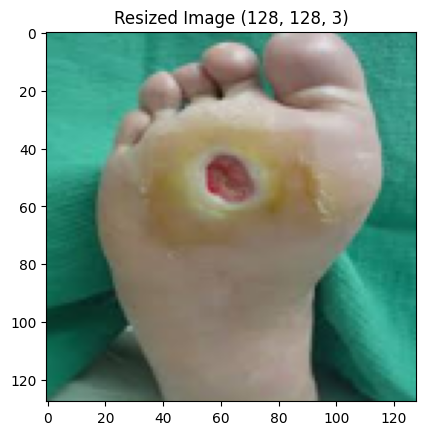

Resized Image Shape: (128, 128, 3)


In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "leg1.jpg"
image = Image.open(image_path)

# Resize the image to (128, 128)
resized_image = image.resize((128, 128))

# Convert the image to a numpy array
resized_array = np.array(resized_image)

# Display the resized image and its shape
plt.imshow(resized_array)
plt.title("Resized Image (128, 128, 3)")
plt.show()

# Print the shape of the resized image
print("Resized Image Shape:", resized_array.shape)




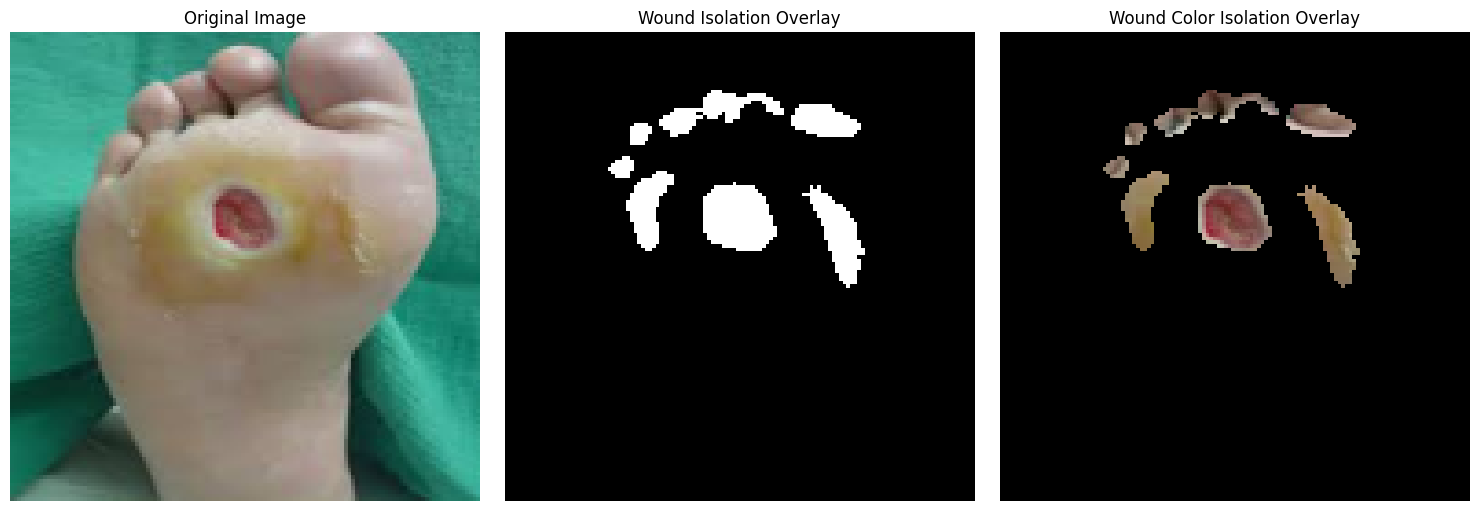

In [13]:
import matplotlib.pyplot as plt

# Assuming X_test[var] and woundIsolation are your images
woundIsolation = preds_test_t;
woundColorIsolation=resized_array*preds_test_t
# Create a new figure
plt.figure(figsize=(15, 5))

# Plot the first image
plt.subplot(1, 3, 1)
plt.imshow(resized_array.squeeze(), cmap='gray')  # Assuming X_test[var] is grayscale
plt.title('Original Image')
plt.axis('off')

# Plot the second image (woundIsolation overlay)
plt.subplot(1, 3, 2)
plt.imshow(woundIsolation.squeeze(), cmap='gray')  # Assuming woundIsolation is grayscale
plt.title('Wound Isolation Overlay')
plt.axis('off')

# Plot the third image (woundColorIsolation overlay)
plt.subplot(1, 3, 3)
plt.imshow(woundColorIsolation.squeeze(), cmap='gray')  # Assuming woundColorIsolation is grayscale
plt.title('Wound Color Isolation Overlay')
plt.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


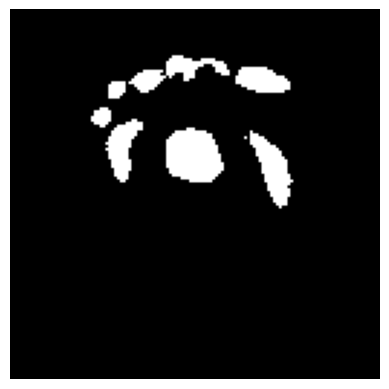

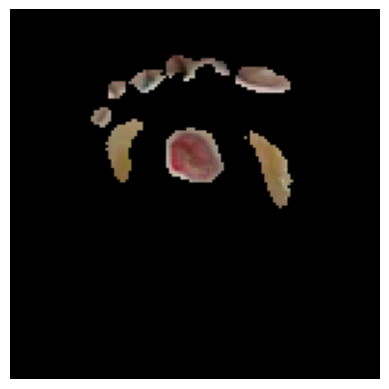

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming woundIsolation is your array with shape (128, 128, 1)
# Assuming woundColorIsolation is your array with shape (128, 128, 3)

# Scale values from range [0, 1] to [0, 255]
woundIsolation = (woundIsolation * 255).astype(np.uint8)
woundColorIsolation = np.clip(woundColorIsolation, 0, 255).astype(np.uint8)
# Clip to ensure values are in [0, 255]

# Convert to PIL Image
Maskedimage = Image.fromarray(woundIsolation.squeeze())  # mode='L' for grayscale
woundColorIsolation = np.squeeze(woundColorIsolation)
Maskedimage_color = Image.fromarray(woundColorIsolation, mode="RGB")    # Assuming woundColorIsolation is in RGB format

# Save the images
Maskedimage.save("MaskedTest_output_image.png")
Maskedimage_color.save("MaskedTest_color_output_image.png")

# Display the images
plt.imshow(Maskedimage,cmap="gray")
plt.axis('off')
plt.show()

plt.imshow(Maskedimage_color)
plt.axis('off')
plt.show()


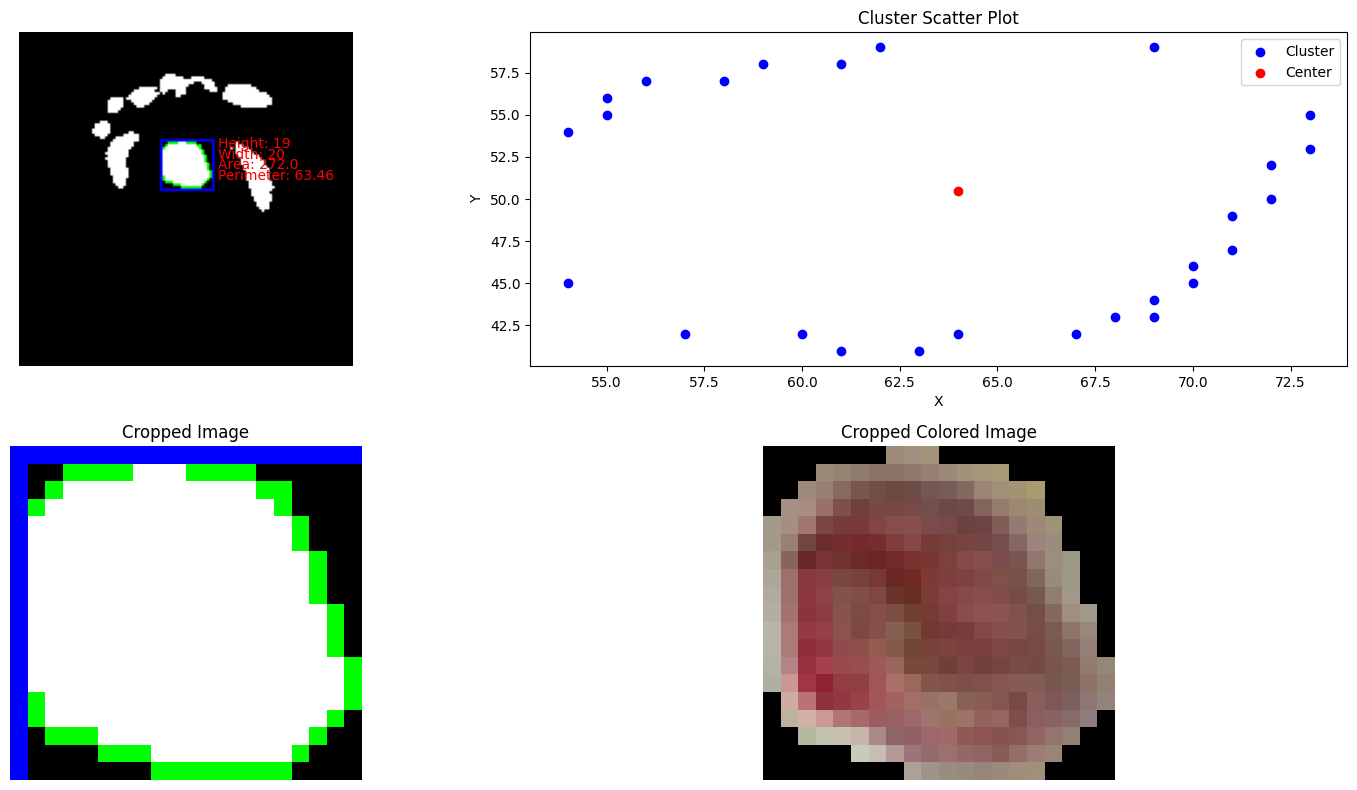

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
Maskedimage = cv2.imread("MaskedTest_output_image.png")
Maskedimage_color = cv2.imread("MaskedTest_color_output_image.png")

gray = cv2.cvtColor(Maskedimage, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
area = cv2.contourArea(largest_contour)
perimeter = cv2.arcLength(largest_contour, True)
x, y, w, h = cv2.boundingRect(largest_contour)
cv2.drawContours(Maskedimage, [largest_contour], -1, (0, 255, 0), 1)
cv2.rectangle(Maskedimage, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Create a figure with subplots
plt.figure(figsize=(16, 8))

# Display the original image with properties
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(Maskedimage, cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.text(x + w + 2, y + 3, f'Height: {h}', color='red', fontsize=10)
plt.text(x + w + 2, y + 7, f'Width: {w}', color='red', fontsize=10)
plt.text(x + w + 2, y + 11, f'Area: {area}', color='red', fontsize=10)
plt.text(x + w + 2, y + 15, f'Perimeter: {perimeter:.2f}', color='red', fontsize=10)
plt.savefig("pr_image.png", bbox_inches='tight', pad_inches=0)

# Plot the scatter plot of the largest contour
plt.subplot(2, 2, 2)
plt.scatter(largest_contour[:, 0, 0], largest_contour[:, 0, 1], color='blue', label='Cluster')
plt.scatter(x + w / 2, y + h / 2, color='red', label='Center')
plt.title('Cluster Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

cropped_image = Maskedimage[y:y+h, x:x+w]
cropped_color_image = Maskedimage_color[y:y+h, x:x+w]

# Display the cropped masked image
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

# Display the cropped colored image
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(cropped_color_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Colored Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [90]:
cv2.imwrite('cropped_image.jpg', cropped_color_image)

True

In [ ]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def geoParams(image="leg1.jpg"):
    # Load the image
    image_path = image
    image = Image.open(image_path)

    # Resize the image to (128, 128)
    resized_image = image.resize((128, 128))

    # Convert the image to a numpy array
    resized_array = np.array(resized_image)

    # Predicted Mask (Assuming you have the model already)
    # Assuming test_img and preds_test_t are defined
    # Replace these with your actual code for predicting masks
    resized_array= np.zeros((128, 128, 3))  # Replace with your actual test image
    preds_test_t = np.zeros((128, 128, 1))  # Replace with your actual predicted mask

    # Post-process the predicted mask if needed

    # Assuming woundIsolation and woundColorIsolation are defined
    woundIsolation = preds_test_t
    woundColorIsolation = resized_array * preds_test_t

    # Create a folder to store images and parameters
    folder_name = "geoParams_output"
    os.makedirs(folder_name, exist_ok=True)

    # Save resized image
    resized_image.save(os.path.join(folder_name, "resized_image.jpg"))

    # Save predicted mask
    plt.imsave(os.path.join(folder_name, "predicted_mask.png"), preds_test_t.squeeze(), cmap='gray')

    # Save overlay images
    plt.imsave(os.path.join(folder_name, "overlay_image.png"), woundIsolation.squeeze(), cmap='gray')
    plt.imsave(os.path.join(folder_name, "overlay_color_image.png"), woundColorIsolation.squeeze())

    # Calculate properties of the largest contour
    gray = cv2.cvtColor(woundIsolation, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Save cropped image
    cropped_image = woundColorIsolation[y:y + h, x:x + w]
    cv2.imwrite(os.path.join(folder_name, "cropped_image.jpg"), cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

    # Store parameters as JSON
    parameters = {
        "height": h,
        "width": w,
        "area": area,
        "perimeter": perimeter
    }
    with open(os.path.join(folder_name, "parameters.json"), "w") as json_file:
        json.dump(parameters, json_file, indent=4)